# Introduction to word embeddings 

So far we understand how do classifiers work, so now we are going to see how to develop effective documents representations using features. We will cover:
- one-hot vectors
- term-document and term-term matrices
- word embeddings
- word2vec
- word & document similarity measurement

---

Text is only a method of transcribing our thoughts - we use it to communicate with other people... and computers! However, if we give a computer raw textual data it has no idea how to interpret this set of characters (actually sequence of bits). Text written in English makes sense to us because we know how to interpret it: we look for features we were taught are meaningful (separate words, multiple words, idioms), recall in our mind what is their meaning and join them together to get the full author's notion. 

If we want a computer to "understand" the text, we first need to tell it the set of features it should look for. Since we want it to understand the text as we do, we can treat words and their combinations as features having specific meanings. Then, we can try to express the **meaning of each word** in a document. As documents consist of words, we will be able to represent the document meaning as a set of meaningful words.

We have already used words as features once - using one-hot vectors. However, as you remember, a one-hot vector tells us only that the word exists somewhere in the document. It does not express the meaning of a single word. One-hot vectors let us see that in sports articles there will be more sports-related vocabulary ("football", "match", "win", etc.) and in politics articles, there will be more politics-related vocabulary ("election", "minister", "parliament", etc.), so we can classify based on the occurrence of the words only. However, all one-hot-encoded words are independent of each other. To understand it better, let's see a simple example: 

Let's encode "dog, cat, fridge" using one-hot vectors.
- kitten [1,0,0]
- cat [0,1,0]
- fridge [0,0,1]
  
Every word is related to a specific term in the vector and there is no situation where a word has more than one non-zero term. If you plot all 3 vectors in the 3d space, they will be perpendicular - meaning independence. What we would like to do, is to capture word meaning similarities - the word "dog" is more similar to the word "cat" than to the word "fridge".

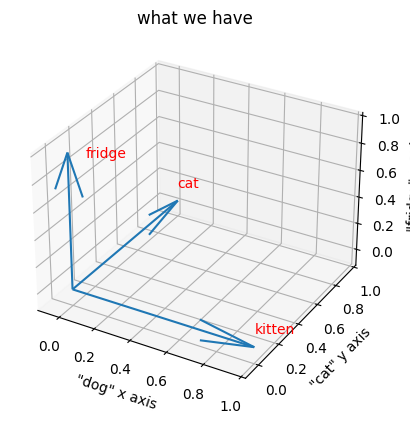

In [1]:
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.quiver(0,0,0,1,0,0, length=1)
ax.quiver(0,0,0,0,1,0, length=1)
ax.quiver(0,0,0,0,0,1, length=1)

ax.set_xlim([-0.1, 1])
ax.set_ylim([-0.1, 1])
ax.set_zlim([-0.1, 1])
ax.set_xlabel('"dog" x axis')
ax.set_ylabel('"cat" y axis')
ax.set_zlabel('"fridge" z axis')
ax.text(1,0, 0.1, "kitten", color="red")
ax.text(0,1, 0.1, "cat", color="red")
ax.text(0.1,0, 1, "fridge", color="red")
ax.set_title("what we have")
plt.show()

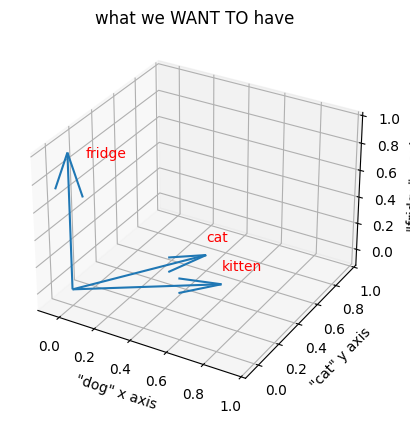

In [2]:

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.quiver(0,0,0,0.6,0.4,0, length=1)
ax.quiver(0,0,0,0.4,0.6,0, length=1)
ax.quiver(0,0,0,0,0,1, length=1)

ax.set_xlim([-0.1, 1])
ax.set_ylim([-0.1, 1])
ax.set_zlim([-0.1, 1])
ax.set_xlabel('"dog" x axis')
ax.set_ylabel('"cat" y axis')
ax.set_zlabel('"fridge" z axis')
ax.text(0.6,0.4, 0.1, "kitten", color="red")
ax.text(0.4,0.6, 0.1, "cat", color="red")
ax.text(0.1,0, 1, "fridge", color="red")
ax.set_title("what we WANT TO have")
plt.show()

Firstly, let's see some methods for giving words a meaning using sparse vectors.

## Vectorisers

The standard representation of a word meaning in NLP is by using a vector. We can also represent whole documents using vectors.

###  Classical one-hot vectors

We have already seen them in previous notebooks. One-hot vector can be used to represent a document from the corpus based on words the document contains.
Let's say we have a corpus C of 3 documents d<sub>1</sub>, d<sub>2</sub>, d<sub>3</sub>.

| document number | document content |
|-----------------|------------------|
| d<sub>1</sub>   | "i like apples"  |
| d<sub>2</sub>   | "we like dogs"   |
| d<sub>3</sub>   | "we and i and dogs" |

Now, we can associate each word with a term in a vector: ["i", "like", "apples", "we", "dogs", "and"], and represent documents using vectors (using max pooling).

| document number | document content |
|-----------------|------------------|
| d<sub>1</sub>   | [1, 1, 1, 0, 0, 0]  |
| d<sub>2</sub>   | [0, 1, 0, 1, 1, 0]  |
| d<sub>3</sub>   | [1, 0, 0, 1, 1, 1]  |

Ok, done! But how can we learn the meanings of these words? Let's build the term-document matrix!

### Term-document matrix

The term-document matrix is the representation of word occurrences in documents from the corpus. It shows how many times each word occurs in each document. Let's visualize it using our corpus C.

|          | d<sub>1</sub> | d<sub>2</sub> | d<sub>3</sub> |
|----------|---|---|---|
| "i"      | 1 | 0 | 1 |
| "like"   | 1 | 1 | 0 |
| "apples" | 1 | 0 | 0 |
| "we"     | 0 | 1 | 1 |
| "dogs"   | 0 | 1 | 1 |
| "and"    | 0 | 0 | 2 |

If you look at columns you can read vectors representing each document. For example the document d<sub>3</sub> is represented by vector [1,0,0,1,1,2]. 

Now, let's look at another, more advanced term-document matrix for a corpus of 4 Shakespeare plays and 4 selected words from them. Note what is the relation in word occurrences between comedies (As You Like It and Twelfth Night) and other plays (Julius Caesar and Henry V).

<div style="text-align:center"><img src="https://raw.githubusercontent.com/TheRootOf3/ucl-nlp-notebook-series/main/Notebook5/nb_resources/pic1.png" alt="" width="800"/></div>

#### Documents similarity

We can use these counts to determine whether the two documents are similar. The intuitive approach is that **two documents are similar if they have similar vectors** - in other words, they contain similar words.

Again, we can represent each document using word counts creating a 4d vector. Since it's impossible to display a 4-dimensional plot, let's see how we can compare these documents using only counts of words "battle" and "fool" using 2d vectors.

<div style="text-align:center"><img src="https://raw.githubusercontent.com/TheRootOf3/ucl-nlp-notebook-series/main/Notebook5/nb_resources/pic2.png" alt="" width="600"/></div>

As you can see, these two words are discriminating documents very well! As expected, in comedies there will be a higher number of "fools" and barely visible "battles", hence based on the words "battle" and "fool", documents "As You Like It" and "Twelfth Night" are similar. The same applies to "Henry V" and "Julius Caesar", where the number of "battles" is higher than the number of "fools". Of course, in normal implementation, we would use vectors of length |V| to represent a document.


#### Words similarity

However, what is interesting, we can also read **row vectors**! We can use them to represent the **meaning of each word**.

<div style="text-align:center"><img src="https://raw.githubusercontent.com/TheRootOf3/ucl-nlp-notebook-series/main/Notebook5/nb_resources/pic3.png" alt="" width="800"/></div>

For example, we can express the word "fool" using a vector [36, 58, 1, 4] and the word "wit" using another vector [20, 15, 2, 3]. Here we can apply the same intuition as to documents: **Two words are similar when they have similar vectors** - they tend to occur in similar documents. So in theory, word "fool" [36, 58, 1, 4] should be more similar to "wit" [20, 15, 2, 3] than to "battle" [1, 0, 7, 13] and indeed, it is true!

###  Term-term matrix

Another way to represent **word meanings** is to use the **term-term matrix**. In this matrix, both rows and columns are labeled with words from the corpus vocabulary. To construct a matrix, for each word *w* we look for the context of this word. We can define the context as *k* previous and *k* next words (usually *k* is small ~5). 

For example, if there is a sentence "At the university I work on data science. My computer performance is quite low." and we look for a context +/- 4 words of the word "computer", we will get words: "on", "data", "science", "My", "performance", "is", "quite", "low". Now, every pair of the word *w* and each of these context words gets +1 in the term-term matrix. If we take every word from V look for its context, and note counts of each co-occurrence, we will develop this word-word co-occurrence matrix. 

The intuition behind this is that if two words co-occur (are nearby in text), their meaning is similar. Let's look at the subset of the term-term matrix for the Wikipedia corpus.

<div style="text-align:center"><img src="https://raw.githubusercontent.com/TheRootOf3/ucl-nlp-notebook-series/main/Notebook5/nb_resources/pic4.png" alt="" width="800"/></div>

As you can see, the word "digital" co-occurs more often with "computer" (1670) than with "sugar" (4). On the other hand, "cherry" is much often seen together with "pie" (442) than with "computer" (2). In other words, "cherry" is more similar to "pie" than to "computer", which makes sense.

##  Word embeddings

All previous examples used long and sparse vectors of length |V| or |D|. For big corpora, the vocabulary may oscillate around 40,000 (Brown Corpus) or even 13,000,000 (Google N-grams). This is not only a waste of space but also such long vectors are often not discriminating well and require a very long learning process. What's even more problematic is that previous examples either don't give us the word meaning at all (one-hot vectors) or give us only the word meaning related to occurrences in some documents. Since we want the computer to understand text in a similar way that we do, we need another way of words meaning representation. As stated earlier, we want to capture word similarities effectively, also considering contexts in which they are used. 

Hence, we introduce the concept of **embeddings**, dense vectors of length up to 1,000 (however often much shorter). Let's exemplify the idea behind them.

Imagine a small vocabulary containing 5 words: king, queen, man, woman, and princess. The one-hot vector for the queen would look like the one below.

<div style="text-align:center"><img src="https://raw.githubusercontent.com/TheRootOf3/ucl-nlp-notebook-series/main/Notebook5/nb_resources/embed_pic0.jpeg" alt="" width="400"/></div>

We could try to develop a term-document or term-term matrix but this is not how embeddings work. It's more about extracting significant attributes characterizing specific words and contexts in which they are used.

That words are rich entities with many layers of connotation and meaning. Let’s hand-craft some semantic features for these 5 words. We will represent each word as having some value between 0 and 1 for 5 semantic qualities: royalty, masculinity, femininity, age, and edibility.

<div style="text-align:center"><img src="https://raw.githubusercontent.com/TheRootOf3/ucl-nlp-notebook-series/main/Notebook5/nb_resources/embed_pic1.jpeg" alt="" width="600"/></div>



The beautfy of word embeddings is the fact that you can perform vector calculus on them (it is of course not that precise for the majority of cases but it is the idea behind it)

<div>
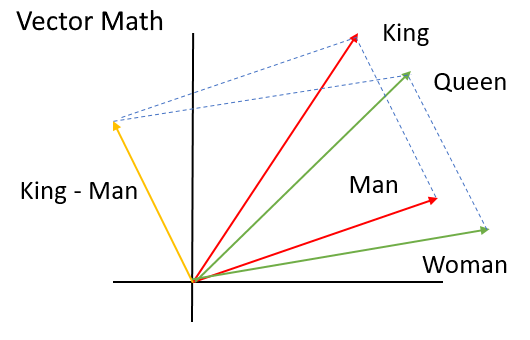
</div>


You do not have to create word embeddings yourself. Pre-trained word embeddings can be downloaded and used in your models. We will also look into the most popular algorithms for learning static word embeddings from a corpus.

###  Static vs contextual

Embeddings can be generally divided into two groups. **Static embeddings** learn a single embedding for each word, independently of the context in which that word is used. This method is simpler and faster and gives decent results. On the other hand, **Contextual embeddings** are more complicated and give better performance, since in this case each word may be represented by more than one embedding (if it occurs in many different contexts). Contextual embeddings, as a relatively new concept, take advantage of complex neural networks and are generally harder to learn and develop. However, contextual embeddings are out of the scope of these notebooks.

### word2vec

Word2vec is one of the most popular algorithms for learning static embeddings. The intuition of word2vec is that instead of calculating frequencies of words co-occurrences (how often a word *w* occurs near a context word *c*?), it trains a classifier to make a decision: Is word *w* likely to occur near a context word *c*? After training the classifier, the word *w* is represented by the vector of classifier **weights**.

What is interesting, to train the classifier we don't need any additional labels because we can use word co-occurrences as labels! The overview of this algorithm is as follows:
1. Treat the target word and a neighboring context word as positive examples.
2. Randomly sample other words in the lexicon to get negative samples.
3. Train a classifier to distinguish those two cases.
4. Use the learned weights as the embeddings.

As you can see, we will generate a training set containing both real word co-occurrences from the source (positive samples) and we will randomly generate some artificial word co-occurrences (negative samples).

However, how do we define *a context* for a target word *w*? There are two approaches:
- CBOW - continuous bag-of-words
- SG - skip-gram

**CBOW** makes a window around the target word *w* of *k* words and treats it as a context. In this case, the word order doesn't matter. CBOW is generally faster to train than SG. CBOW tries to predict the target word *w* based on context words. During the learning process, context words are used as an input and the target word is used as an output. 

**SG** also creates a window of surrounding words but in this case their order and distance from the target word *w* matter. The Skip-gram approach works better for infrequent words. The popular version of SG is **skip-gram with negative sampling** (**SGNS**), where the great majority of all training samples are negative. In terms of predicting, skip-gram does it differently than CBOW. SG given the target word tries to predict context words in an appropriate order. 

<div style="text-align:center"><img src="https://raw.githubusercontent.com/TheRootOf3/ucl-nlp-notebook-series/main/Notebook5/nb_resources/cbow_vs_sg.png" alt="" width="600"/></div>

We will use word2vec python package called `Gensim`. You can download pre-trained word embeddings using Gensim as it's specified [here](https://radimrehurek.com/gensim/auto_examples/howtos/run_downloader_api.html) (we will also do it later).

###  Embeddings example with word2vec
There are two ways we can take advantage of word2vec:
- we can use it to create our own word embedding model
- we can use pre-trained word embeddings models 
  
Let's start with the first approach.

#### Training the model
We will need some data to train the model. Let's use the BBC news articles dataset again.

In [3]:
import gensim
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/lisawork/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/lisawork/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
import pandas as pd
bbc_data = pd.read_csv("../Datasets/bbc-text.csv")

In [5]:
def preprocess_doc(doc):
    # Tokenize
    split_doc = word_tokenize(doc)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    cleaned_doc = []
    for word in split_doc:
        if word not in stop_words:
            cleaned_doc.append(word)
    return cleaned_doc

In [6]:
cleaned_docs = []
for doc in bbc_data["text"]:
    cleaned_docs.append(preprocess_doc(doc))

Now, we have a list of tokenized documents. We can do one more thing before training the model - extract phrases. We can use Gensim Phrases to replace common words co-occurrences with a single token (e.g. "Mr" + "Johnson" = "Mr_Johnson"). 

In [7]:
from gensim.models.phrases import Phraser, Phrases

# develop phrases
phrases = Phrases(cleaned_docs)

# Let's see some examples
list(phrases.vocab)[:10]

['tv',
 'future',
 'tv_future',
 'hands',
 'future_hands',
 'viewers',
 'hands_viewers',
 'home',
 'viewers_home',
 'theatre']

In [9]:
# replace current word co-occurrences with phrases
bigrams = Phraser(phrases)
cleaned_docs_phrases = bigrams[cleaned_docs]

Ok, now we can train our model using preprocessed data. Word2Vec model has many parameters, which you can find and explore in the Gensim Word2Vec [documentation](https://radimrehurek.com/gensim/models/word2vec.html). Let's cover the most important parameters:
- `min_count` - if a word occurrence count in the corpus is lower than this value it will be ignored (helpful, since ignores accidental words with typos).
- `window` - this specifies what is the size of the context window for CBOW and skip-gram
- `vector_size` - this number specifies the length of the embedding vector
- `workers` - number of machine cores used for training (speed up drastically the learning process)

In [13]:
model.corpus_count

2225

In [10]:
# Initialize the model. Change workers paramater to 1 if your machine does not support multicore processing.
model = gensim.models.Word2Vec(min_count=5, window=4, workers=4, vector_size=100) #might be just "size" depending version

# Build vocabulary
model.build_vocab(cleaned_docs_phrases)
# Train the model. total_examples is the size of the vocabulary
model.train(cleaned_docs_phrases, total_examples=model.corpus_count, epochs=30)

(11830335, 14215470)

In [11]:
cleaned_docs_phrases

Here are the learned vectors!

In [12]:
model.wv.vectors

array([[ 0.2269013 , -0.9565562 , -0.09834254, ...,  1.026708  ,
         0.6723954 ,  0.23151493],
       [-1.5635965 , -0.64777327,  0.7419468 , ...,  0.53440744,
        -0.86981434,  0.77414066],
       [-1.359762  ,  0.6584183 , -1.5157981 , ...,  0.67170465,
         1.2293048 , -2.5581908 ],
       ...,
       [ 0.0177671 ,  0.33878565, -0.25403726, ...,  0.07240985,
        -0.13565928,  0.18610594],
       [-0.07587674,  0.13139664,  0.15550391, ..., -0.20851833,
         0.09459874, -0.10922634],
       [-0.26273984,  0.00953508,  0.23574744, ...,  0.0184918 ,
        -0.3861482 , -0.02327287]], dtype=float32)

If you want to get a vector for a specific word, you can use the `.get_vector()` method or simply index the wv object:

In [13]:
model.wv.get_vector("football")
#model.wv["football"] #does the same

array([ 0.14417294, -0.546365  ,  0.6581163 ,  1.4526317 , -0.5502005 ,
       -1.2741104 ,  2.476472  ,  2.0140805 ,  0.3786281 ,  0.6194186 ,
       -1.3711597 , -0.3251976 , -0.38578114,  2.7276294 ,  1.2350509 ,
        0.82417434,  0.10396738, -0.72519374, -1.8694103 ,  0.4094339 ,
        0.4177132 ,  1.3507918 ,  0.5158973 , -1.8452129 , -1.183386  ,
       -0.02144906,  0.4595777 ,  0.3574411 ,  0.35349658, -0.47940505,
       -0.57552534,  0.20250322, -0.09765233,  0.24229886,  0.55135596,
        1.3028088 , -1.1778562 , -0.05625595,  0.56711346,  0.33736598,
       -0.10825277,  0.22692494,  0.5822072 , -0.16841334,  1.6136543 ,
        1.4882101 ,  0.28593138, -0.10135715,  0.43599683,  0.66571563,
       -0.14174262, -1.0402546 , -0.8108261 ,  0.83904326,  0.8916001 ,
        2.2080188 , -0.8165411 , -0.9981943 , -0.5291496 ,  0.7744733 ,
       -0.18333052, -0.09960801,  1.1612628 ,  1.2793329 ,  0.048186  ,
        0.9774152 , -1.1485089 ,  1.1214333 ,  0.71749365, -1.11

or

#### We can also use pre-trained models 

We often don't need to train our model, since there is a lot of existing and well pre-trained models. Let's see how to use pre-trained word embeddings using word2vec from the `gensim` package. Firstly, we need to **download a pre-trained word embeddings model**. We will use the model trained on google news containing about 100 billion words. 

**Note: It weights around 1.5GB!**

In [17]:
import gensim.downloader as api
google_wv = api.load('word2vec-google-news-300')

[--------------------------------------------------] 1.4% 23.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=-------------------------------------------------] 3.2% 53.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===-----------------------------------------------] 7.0% 116.3/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[====----------------------------------------------] 9.3% 154.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=====---------------------------------------------] 11.8% 195.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[======--------------------------------------------] 13.6% 225.5/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========------------------------------------------] 17.9% 298.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=========-----------------------------------------] 19.7% 326.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===========---------------------------------------] 22.2% 370.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===========---------------------------------------] 24.0% 399.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============-------------------------------------] 27.3% 454.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==============------------------------------------] 29.2% 485.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[================----------------------------------] 33.0% 548.5/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================---------------------------------] 34.8% 577.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==================--------------------------------] 37.8% 629.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[====================------------------------------] 40.4% 671.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=====================-----------------------------] 42.3% 703.3/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=======================---------------------------] 47.4% 787.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==========================------------------------] 52.1% 866.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==========================------------------------] 53.9% 896.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===========================-----------------------] 55.8% 927.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[============================----------------------] 57.5% 955.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============================---------------------] 59.2% 985.2/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===============================-------------------] 63.3% 1053.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[================================------------------] 65.1% 1082.3/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==================================----------------] 68.7% 1142.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===================================---------------] 70.3% 1169.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[====================================--------------] 73.0% 1214.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========================================----------] 81.5% 1354.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=========================================---------] 83.3% 1384.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===========================================-------] 86.7% 1442.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[============================================------] 88.5% 1471.2/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============================================-----] 91.8% 1526.3/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===============================================---] 94.9% 1578.3/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================================================-] 99.1% 1647.5/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [18]:
# word2vec-google-news-300 model embedding vector length is 300
google_wv.get_vector("football")

array([-9.76562500e-02,  3.19824219e-02,  2.57812500e-01, -4.15039062e-02,
        1.01562500e-01, -1.00585938e-01,  1.46484375e-01, -1.99218750e-01,
        1.53320312e-01,  6.34765625e-02,  8.39843750e-02, -3.00781250e-01,
        6.34765625e-02,  2.08984375e-01, -2.11914062e-01,  1.88476562e-01,
       -8.34960938e-02,  3.28125000e-01,  2.79296875e-01, -1.40625000e-01,
       -1.68945312e-01,  2.04101562e-01,  4.90722656e-02, -6.98852539e-03,
        9.42382812e-02,  9.84191895e-04,  3.12500000e-02,  2.48046875e-01,
        3.35937500e-01,  2.63671875e-01,  5.68847656e-02,  3.04687500e-01,
        1.21582031e-01, -1.97265625e-01,  1.72119141e-02,  9.96093750e-02,
        2.27539062e-01, -1.20605469e-01,  1.23535156e-01,  3.78906250e-01,
        2.36816406e-02, -1.86523438e-01,  6.29882812e-02,  1.52343750e-01,
        3.73535156e-02, -1.69921875e-01,  1.06445312e-01, -4.98046875e-02,
       -6.20117188e-02,  1.68945312e-01,  4.41894531e-02,  2.78320312e-02,
       -1.10839844e-01,  

Ok, but what do we do with these vectors? How can we use them? Let's explore it in the next section.

### Embeddings application - similarity measurement

Word embeddings are used as weights in neural networks, but since NNs are out of the scope of this article, we will use them for something different. The other application of embeddings is the **word and document similarity measurement**. So far, we have already developed word embeddings and we understand that two words are similar if their vectors point in a "similar" direction and are opposite otherwise. But what does the "similar" direction actually mean? We need to develop a mathematical way to measure this similarity. 

#### Cosine similarity measure

We need to define a **measure of vector similarity**, that takes two vectors as an input and returns a measure of their similarity. The most common similarity metric is the **cosine of the angle between two vectors**. Intuitively, if the angle between two vectors is small (cosine is large) then these two vectors point in a similar direction. If the angle between two vectors is large (cosine is small) then these vectors point in different (or even opposite) directions.

The cosine of two vectors *v* and *w* is given by the following equation:

<div style="text-align:center"><img src="https://raw.githubusercontent.com/TheRootOf3/ucl-nlp-notebook-series/main/Notebook5/nb_resources/eq1.png" alt="" width="400"/></div>

where |v| means the length of the vector *v*. However, why do we divide by these lengths? Vectors differ not only in direction but also in length. Generally, since vector terms represent word counts in documents (term-document matrix) or word co-occurrences (term-term matrix), frequent words will have much longer vectors than rare words. Thus, we need to **normalize** their lengths so they don't affect the measure - we want to know how much two vectors differ regardless of their lengths. 

Having all this knowledge, we can try to check the cosine measure between some word embeddings from our model.

Let's manually check the relationship between words "ball", "match" and "president". Bear in mind that cosine values are from -1 to 1 (-1 totally opposite, 1 perfectly similar). In the following example, we are going to use our **BBC model**.

In [14]:
ball_embedding = model.wv.get_vector("ball")
match_embedding = model.wv.get_vector("match")
president_embedding = model.wv.get_vector("president")

In [15]:
from numpy import dot
from numpy.linalg import norm

def vector_cos(v1, v2):
    return dot(v1, v2)/(norm(v1) * norm(v2))

In [16]:
print(vector_cos(ball_embedding, match_embedding))
print(vector_cos(ball_embedding, president_embedding))
print(vector_cos(match_embedding, president_embedding))

0.40905422
-0.20915477
-0.11974026


As expected, the words "ball" and "match" tend to have a similar meaning, while the word "president" shows the difference in meaning with both "ball" and "match". Of course, we don't have to manually make all these calculations. We can use built-in methods from Gensim Word2Vec.

In [17]:
# For example, we may want to find most similar words to the word "tv"
model.wv.most_similar(positive=['tv'])

[('television', 0.7572618126869202),
 ('channel', 0.6994667053222656),
 ('broadcast', 0.6784460544586182),
 ('channels', 0.662401556968689),
 ('sky', 0.6466793417930603),
 ('broadcasts', 0.6448764204978943),
 ('programmes', 0.6205058693885803),
 ('broadcasting', 0.6196846961975098),
 ('bbc', 0.6173892617225647),
 ('viewers', 0.6144801378250122)]

In [18]:
# Or we may want to check the similarity between two words
model.wv.similarity("election", "vote")

0.5539979

In [19]:
model.wv.similarity("election", "golf")

0.03704348

#### Similarity between documents

Now, to measure the similarity between two documents, we can represent them as weighted sums of word embeddings:

In [20]:
d1 = bbc_data['text'].iloc[1]  # bussiness article
d2 = bbc_data['text'].iloc[2]  # sport article
d3 = bbc_data['text'].iloc[3]  # another sport article

bbc_data[['text', 'category']].iloc[1:4]

,text,category
1,worldcom boss left books alone former worldc...,business
2,tigers wary of farrell gamble leicester say ...,sport
3,yeading face newcastle in fa cup premiership s...,sport


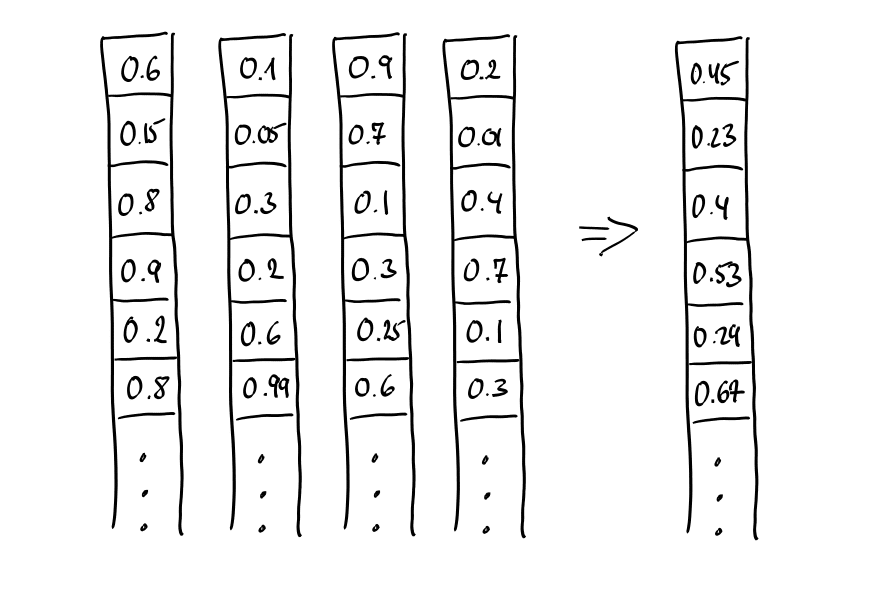

In [21]:
def document_weighted_sum(document, model):
    cleaned_doc = preprocess_doc(document)
    # Empty vector containing only 0s
    sum_v = np.zeros((model.vector_size))

    if len(sum_v) == 0:
        return sum_v

    # add each word embedding vector to the sum vector
    for token in cleaned_doc:
        if token in model.wv.key_to_index:
            sum_v = np.add(sum_v, model.wv.get_vector(token))    
    # divide by the number of added vectors
    sum_v = np.divide(sum_v, model.vector_size)

    return sum_v


Let's check the similartiy vector between all three documents:

In [22]:
weighted_vector1 = document_weighted_sum(d1, model)
weighted_vector2 = document_weighted_sum(d2, model)
weighted_vector3 = document_weighted_sum(d3, model)

In [23]:
vector_cos(weighted_vector1, weighted_vector2)

0.364384460968911

In [24]:
vector_cos(weighted_vector1, weighted_vector3)

0.26853425610980586

In [25]:
vector_cos(weighted_vector2, weighted_vector3)

0.6520798836308008

As you can see, the model clearly shows that the biggest similarity is between articles about sport.

### Similarity measurement - word embeddings vs one-hot vectors

Let's see why cosine similarity works well with word embeddings and doesn't work with one-hot vectors. Let's say we have two similar sentences in terms of semantics:
- Since I enjoy spending time with animals, I decided to buy a dog
- You are thinking of adopting a cat because you like pets


We expect these two sentences to have relatively high similarity measures since they both are about enjoying animals and wanting to get one. We will use pre-trained word embeddings from the google news model.

In [26]:
sentences = ["Since I enjoy spending time with animals I decided to buy a dog", "You are thinking of adopting a cat because you like pets"]
split_sentences = [word_tokenize(doc) for doc in sentences]
print(split_sentences)

[['Since', 'I', 'enjoy', 'spending', 'time', 'with', 'animals', 'I', 'decided', 'to', 'buy', 'a', 'dog'], ['You', 'are', 'thinking', 'of', 'adopting', 'a', 'cat', 'because', 'you', 'like', 'pets']]


Let's create a `sentence_weighted_sum` function to extract the meaning of each sentence.

In [27]:
def sentence_weighted_sum(sentence, wv):  #for the downloaded model 
    doc_tokenized = preprocess_doc(sentence)
    sum_v = np.zeros((wv.vector_size))

    if len(sum_v) == 0:
        return sum_v

    for token in doc_tokenized:
        if token in wv.key_to_index:
            sum_v = np.add(sum_v, wv.get_vector(token))
        sum_v = np.add(sum_v, wv.get_vector(token))
    
    sum_v = np.divide(sum_v, wv.vector_size)

    return sum_v

In [28]:
s1_meaning = sentence_weighted_sum(sentences[0], google_wv)
s2_meaning = sentence_weighted_sum(sentences[1], google_wv)

NameError: name 'google_wv' is not defined

In [63]:
vector_cos(s1_meaning, s2_meaning)

0.7002057495425555

As you can see, the cosine similarity for these two sentences is high when using word embeddings. How about one-hot vectors?

Firstly, let's process both sentences in a similar way to what we did for word embeddings (tokenize, remove stopwords).

In [64]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(lowercase=False, token_pattern=r"\w+")
processed_s1 = preprocess_doc(sentences[0])
processed_s2 = preprocess_doc(sentences[1])

transformed = count_vectorizer.fit_transform([" ".join(processed_s1), " ".join(processed_s2)])

Let's the word-features and transformed sentences.

In [65]:
# Let's inspect our features
print(count_vectorizer.get_feature_names())
print(transformed[0].toarray())
print(transformed[1].toarray())

['I', 'Since', 'You', 'adopting', 'animals', 'buy', 'cat', 'decided', 'dog', 'enjoy', 'like', 'pets', 'spending', 'thinking', 'time']
[[2 1 0 0 1 1 0 1 1 1 0 0 1 0 1]]
[[0 0 1 1 0 0 1 0 0 0 1 1 0 1 0]]


/home/lisawork/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Now, let's calculate the cosine similarity between these two vectors!

In [59]:
vector_cos(transformed[0].toarray(), transformed[1].toarray().T)

array([[0.]])

As you can see, the cosine similarity for one-hot vectors is 0. This is because even these sentences have similar meanings, they do not have any common words (after stopwords removal)! Since bag-of-words is based on word counts, if two documents have no common words, they are totally different (from the BOW perspective). However, word embeddings capture word similarities ("dog" is close to "cat", "buy" is close to "adopt", etc.) and when applied, they can show the similarity in this case.